# Benchmarking
benchmarking using [MQTBench](https://mqt.readthedocs.io/projects/bench/en/latest/Quickstart.html) with QFT for 15 qubits

In [1]:
from lib.distributed_coupling_map import build_coupling_list_ring, build_coupling_list_full, build_coupling_list_grid, build_coupling_list_line, build_coupling_list_t_horizontal, build_coupling_list_t_vertical
from lib.interaction_mapping import InteractionMapping
# from lib.debug_interaction_mapping import InteractionMapping
from lib.interaction_layout import InteractionLayout
from lib.lookahead_routing import DynamicLookaheadSwap
# from lib.debug_lookahead_routing import DynamicLookaheadSwap
from lib.timer_helper import Timer

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap, PassManager, StagedPassManager
from qiskit.transpiler.passes import SabreLayout, SabreSwap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.preset_passmanagers.common import generate_embed_passmanager, generate_routing_passmanager
from qiskit.providers import Backend
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_ibm_runtime.fake_provider import FakeLondonV2
from qiskit.converters import circuit_to_dag
from qiskit.visualization import plot_coupling_map, plot_circuit_layout, plot_histogram

In [3]:
from mqt.bench import get_benchmark, CompilerSettings, QiskitSettings

In [4]:
optimization_level = 0
compiler_settings = CompilerSettings(qiskit=QiskitSettings(optimization_level))

In [5]:
benchmark_name = "ghz"
# level = "indep" # but cannot compare because need translation
level = "nativegates"
circuit_size = 5
qc_ghz = get_benchmark(
    benchmark_name=benchmark_name, level=level, circuit_size=circuit_size, 
    compiler="qiskit", compiler_settings=compiler_settings, provider_name="ibm"
)
print(f"Circuit {benchmark_name}[{circuit_size}] -> size: {qc_ghz.size()} depth: {qc_ghz.depth()}")
# display(qc_ghz.draw("mpl"))

Circuit ghz[5] -> size: 12 depth: 8


Transpiled ghz[5] -> size: 12 depth: 8


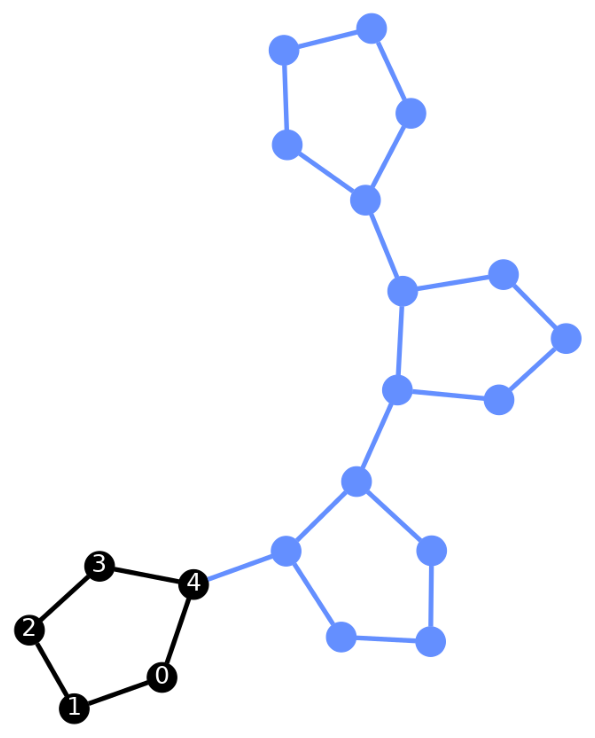

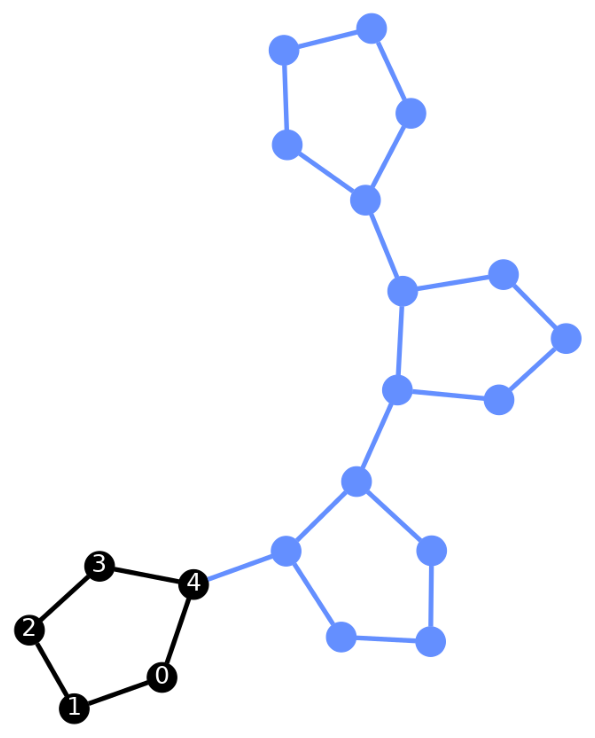

In [6]:
num_qubits = 5
num_group = 4
coupling_list_ring = build_coupling_list_ring(num_qubits, num_group)
coupling_map_ring = CouplingMap(couplinglist=coupling_list_ring)

backend_ring = GenericBackendV2(num_qubits=num_qubits * num_group, coupling_map=coupling_map_ring)
pass_manager = generate_preset_pass_manager(optimization_level, backend=backend_ring)
qc_ghz_isa = pass_manager.run(qc_ghz)
print(f"Transpiled {benchmark_name}[{circuit_size}] -> size: {qc_ghz_isa.size()} depth: {qc_ghz_isa.depth()}")
display(plot_circuit_layout(qc_ghz_isa, backend_ring, view='physical'))
display(plot_circuit_layout(qc_ghz_isa, backend_ring, view='virtual'))

In [12]:
# use dictionary to save the result
benchmark_name_list = [
    # "ae", # list index out of range? because qreg use eval1, eval2, eval3
    "dj",
    # "grover-noancilla", # '[5] grover-noancilla': {'size': 720, 'depth': 453, 'interval': 0.13467860221862793}
    # "grover-v-chain", # '[5] grover-v-chain': {'size': 750, 'depth': 464, 'interval': 0.11993575096130371}
    "ghz",
    "graphstate",
    "portfolioqaoa",
    "portfoliovqe",
    "qaoa",
    "qft",
    "qftentangled",
    "qnn",
    # "qpeexact", # qreg use psi
    # "qpeinexact", # qreg use psi
    # "qwalk-noancilla", # '[5] qwalk-noancilla': {'size': 1310, 'depth': 915, 'interval': 0.07286214828491211}
    # "qwalk-v-chain", # '[5] qwalk-v-chain': {'size': 856, 'depth': 583, 'interval': 0.022635459899902344}
    "random",
    "realamprandom",
    "su2random",
    "twolocalrandom",
    "vqe",
    "wstate",
    
    # non-scalable benchmarks
    
    # "shor", # benchmark_instance_name must be defined for this benchmark.
    # "pricingcall", # Benchmark pricingcall[5] -> size: 901 depth: 568 interval: 0.18169641494750977
    # "pricingput", # Benchmark pricingput[5] -> size: 931 depth: 568 interval: 0.1800365447998047
    # "groundstate", # benchmark_instance_name must be defined for this benchmark.
    # "routing",
    # "tsp",
]

In [13]:
circuit_size_list = [5, 10, 15] # 20 cannot, runtime > 20mins for each algo

def init_dict_benchmark(circuit_size_list, benchmark_name_list, dict_benchmark):
    for circuit_size in circuit_size_list:
        if str(circuit_size) not in dict_benchmark: # circuit size level
            dict_benchmark[str(circuit_size)] = {}
        for benchmark_name in benchmark_name_list:
            if benchmark_name not in dict_benchmark[str(circuit_size)]: # benchmark name level
                dict_benchmark[str(circuit_size)][benchmark_name] = {}
            if 'init' not in dict_benchmark[str(circuit_size)][benchmark_name]: # coupling map level
                dict_benchmark[str(circuit_size)][benchmark_name]['init'] = {}
    return dict_benchmark

In [14]:
import json
def save_dict_to_file(dict_benchmark):
    with(open("result/benchmarking_FINAL.json", "w") as outfile):
        json.dump(dict_benchmark, outfile)

In [15]:
# Initialize from EMPTY

# level: circuit_size -> benchmark_name -> coupling_map, ex: ['init'], ['ring_5_4'], ['line_5_4'] -> ['size'], ['swap'], ['depth' (optional)], ['interval']
# line, full, ring_10_2, ring_5_4, grid_3_3_2, grid_3_2_3, t_horizontal_4, t_vertical_4

# provide around 18 (grid) - 20 num_qubits in total
# dict_benchmark = {}
# dict_benchmark = init_dict_benchmark(circuit_size_list, benchmark_name_list, dict_benchmark)
# print(dict_benchmark)
# save_dict_to_file(dict_benchmark)

{'5': {'dj': {'init': {}}, 'ghz': {'init': {}}, 'graphstate': {'init': {}}, 'portfolioqaoa': {'init': {}}, 'portfoliovqe': {'init': {}}, 'qaoa': {'init': {}}, 'qft': {'init': {}}, 'qftentangled': {'init': {}}, 'qnn': {'init': {}}, 'random': {'init': {}}, 'realamprandom': {'init': {}}, 'su2random': {'init': {}}, 'twolocalrandom': {'init': {}}, 'vqe': {'init': {}}, 'wstate': {'init': {}}}, '10': {'dj': {'init': {}}, 'ghz': {'init': {}}, 'graphstate': {'init': {}}, 'portfolioqaoa': {'init': {}}, 'portfoliovqe': {'init': {}}, 'qaoa': {'init': {}}, 'qft': {'init': {}}, 'qftentangled': {'init': {}}, 'qnn': {'init': {}}, 'random': {'init': {}}, 'realamprandom': {'init': {}}, 'su2random': {'init': {}}, 'twolocalrandom': {'init': {}}, 'vqe': {'init': {}}, 'wstate': {'init': {}}}, '15': {'dj': {'init': {}}, 'ghz': {'init': {}}, 'graphstate': {'init': {}}, 'portfolioqaoa': {'init': {}}, 'portfoliovqe': {'init': {}}, 'qaoa': {'init': {}}, 'qft': {'init': {}}, 'qftentangled': {'init': {}}, 'qnn': {

In [16]:
import json
def open_json_from_file():
    with open("result/benchmarking_FINAL.json") as json_file:
        return json.load(json_file)

In [129]:
# Initialize from JSON

dict_benchmark = open_json_from_file()
print(dict_benchmark)

{'5': {'dj': {'init': {'size': 36, 'depth': 11, 'interval': 0.007391452789306641}, 'full_20_1': {'basic_size': 36, 'basic_depth': 11, 'basic_swap': 0, 'basic_interval': 0.00593256950378418, 'sabre_size': 36, 'sabre_depth': 11, 'sabre_swap': 0, 'sabre_interval': 0.009633779525756836, 'lookahead_size': 36, 'lookahead_depth': 11, 'lookahead_swap': 0, 'lookahead_interval': 0.0056610107421875}, 'line_20_1': {'basic_size': 72, 'basic_depth': 40, 'basic_swap': 36, 'basic_interval': 0.011270999908447266, 'sabre_size': 42, 'sabre_depth': 24, 'sabre_swap': 6, 'sabre_interval': 0.0072591304779052734, 'lookahead_size': 38, 'lookahead_depth': 14, 'lookahead_swap': 6, 'lookahead_interval': 0.006912708282470703}, 'full_10_2': {'basic_size': 36, 'basic_depth': 11, 'basic_swap': 0, 'basic_interval': 0.004221916198730469, 'sabre_size': 39, 'sabre_depth': 17, 'sabre_swap': 3, 'sabre_interval': 0.008487939834594727, 'lookahead_size': 36, 'lookahead_depth': 11, 'lookahead_swap': 0, 'lookahead_interval': 0.

In [18]:
def start_initial_benchmark(benchmark_name: str, circuit_size: int, dict_benchmark: dict):
    level = "nativegates"
    optimization_level = 0
    compiler_settings = CompilerSettings(qiskit=QiskitSettings(optimization_level))
    with Timer() as t:
        qc = get_benchmark(
        benchmark_name=benchmark_name, level=level, circuit_size=circuit_size, 
        compiler="qiskit", compiler_settings=compiler_settings, provider_name="ibm"
        )
        qc.remove_final_measurements()
    dict_benchmark[str(circuit_size)][benchmark_name]['init']['size'] = qc.size()
    dict_benchmark[str(circuit_size)][benchmark_name]['init']['depth'] = qc.depth()
    dict_benchmark[str(circuit_size)][benchmark_name]['init']['interval'] = t.interval

    dag = circuit_to_dag(qc)
    # TODO: remove measure because error in mapping physical wire -> logical qubit -> classical register
    return qc, dag

# if want to change interval in ms = t.interval*10**3

In [26]:
import math

def build_generic_backend(
    layout_name: str, num_qubits: int, num_group: int # num_rows and num_cols only used in grid
) ->  GenericBackendV2:
    if layout_name == "full":
        couplinglist = build_coupling_list_full(num_qubits, num_group)
        backend_qubits = num_qubits * num_group
    elif layout_name == "line":
        couplinglist = build_coupling_list_line(num_qubits, num_group)
        backend_qubits = num_qubits * num_group
    elif layout_name == "ring":
        couplinglist = build_coupling_list_ring(num_qubits, num_group)
        backend_qubits = num_qubits * num_group
    elif layout_name == "grid":
        num_rows = math.ceil(math.sqrt(num_qubits))
        num_columns = math.floor(math.sqrt(num_qubits))
        couplinglist = build_coupling_list_grid(num_rows, num_columns, num_group)
        backend_qubits = num_rows * num_columns * num_group
    elif layout_name == "t_horizontal":
        couplinglist = build_coupling_list_t_horizontal(num_group)
        backend_qubits = 5 * num_group
    elif layout_name == "t_vertical":
        couplinglist = build_coupling_list_t_vertical(num_group)
        backend_qubits = 5 * num_group
    else:
        raise Exception(f"Layout name: {layout_name} is not supported yet.")

    gen_backend = GenericBackendV2(num_qubits=backend_qubits, coupling_map=couplinglist) # can directly add coupling list without casting to CouplingMap
    return gen_backend

In [88]:
from qiskit.circuit import SessionEquivalenceLibrary
from qiskit.transpiler.passes.basis.basis_translator import BasisTranslator


def build_pass_manager(
    routing_option: str, backend: Backend, best_layout=None
) -> PassManager:
    if routing_option == "lookahead":
        if best_layout is None:
            raise Exception(
                f"Provide initial layout for Interaction Layout and Lookahead Swap."
            )
        pass_manager = StagedPassManager()
        pass_manager.layout = PassManager(InteractionLayout(
            coupling_map=backend.coupling_map, initial_map=best_layout
        ))
        pass_manager.layout += generate_embed_passmanager(backend.coupling_map)
        pass_manager.routing = generate_routing_passmanager(
            DynamicLookaheadSwap(backend.coupling_map), target=backend.coupling_map
        )
        # TODO: routing here adds SWAP gate, need to multiply by 3

    elif routing_option == "sabre":
        pass_manager = generate_preset_pass_manager(
            optimization_level=0,
            backend=backend,
            layout_method="sabre",
            routing_method="sabre",
        )
    elif routing_option == "basic":
        pass_manager = generate_preset_pass_manager(
            optimization_level=0,
            backend=backend,
            layout_method="trivial",
            routing_method="basic",
        )
    else:
        raise Exception(f"Swap technique {routing_option} is not available yet.")
    return pass_manager

In [89]:
def update_dict_size_depth(qc, dag, layout_name, num_qubits, num_group, routing_option, dict_benchmark):
    with Timer() as lookahead:
        backend = build_generic_backend(layout_name, num_qubits, num_group)
        mapping = InteractionMapping(backend.coupling_map, dag)
        best_layout = mapping.get_best_qpi_layout()
        print(f"Best layout: {best_layout}")
    
    with Timer() as t:
        pm = build_pass_manager(routing_option, backend, best_layout)
        isa = pm.run(qc)
        # display(plot_circuit_layout(isa, backend, view='virtual'))
        # display(plot_circuit_layout(isa, backend, view='physical'))
    
    if f'{layout_name}_{num_qubits}_{num_group}' not in dict_benchmark[str(circuit_size)][benchmark_name]:
        dict_benchmark[str(circuit_size)][benchmark_name][f'{layout_name}_{num_qubits}_{num_group}'] = {}
    dict_benchmark[str(circuit_size)][benchmark_name][f'{layout_name}_{num_qubits}_{num_group}'][f'{routing_option}_size'] = isa.size()
    dict_benchmark[str(circuit_size)][benchmark_name][f'{layout_name}_{num_qubits}_{num_group}'][f'{routing_option}_depth'] = isa.depth()
    
    # dict_benchmark[str(circuit_size)][benchmark_name][f'{layout_name}_{num_qubits}_{num_group}'][f'{routing_option}_swap'] = isa.size() - qc.size()

    if routing_option == 'lookahead':
        interval = lookahead.interval + t.interval
        additional_swap = (isa.size() - qc.size()) * 3 # TODO: (isa.size() + dag.num_clbits() - qc.size()) * 3 issue with measure mapping, therefore add swap calculation here
    else:
        interval = t.interval
        additional_swap = (isa.size() - qc.size())
    dict_benchmark[str(circuit_size)][benchmark_name][f'{layout_name}_{num_qubits}_{num_group}'][f'{routing_option}_swap'] = additional_swap
    dict_benchmark[str(circuit_size)][benchmark_name][f'{layout_name}_{num_qubits}_{num_group}'][f'{routing_option}_interval'] = interval

In [122]:
benchmark_name_list = [
    # "ae", # qregs['q'] not found, found 'eval'
    "dj", # [5,10, 15] (3.9s)
    # "grover-noancilla", # 'qreg use AncillaQubit 'flag'
    # "grover-v-chain", # 'qreg use AncillaQubit 'flag'
    "ghz", # [5, 10, 15] DONE all3 (3.7s)
    "graphstate", # [5, 10, 15] DONE all3 (4.5s)
    "portfolioqaoa", # [10] ring_7_3 failed, [15] full_7_3, ring_7_3 failed
    "portfoliovqe", # [10] ring_7_3 failed, [15] full_7_3, ring_7_3 failed
    "qaoa", # [5, 10, 15] (1m 35.7s)
    "qft", # [5, 10] [15] ring_7_3 failed
    "qftentangled", # [10] ring_7_3 failed, [15] ring_7_3 failed
    "qnn", # [10] ring_7_3 failed, [15] full_7_3, ring_7_3 failed
    # "qpeexact", # qreg use psi Qubit(QuantumRegister(9, 'q'), 8), Qubit(QuantumRegister(1, 'psi'), 0)
    # "qpeinexact", # qreg use psi
    # "qwalk-noancilla", # '[5] qregs['q'] not found, found 'node', 'coin'
    # "qwalk-v-chain", # qregs['q'] not found, found 'ancilla', 'node', 'coin'
    "random", # [10] ring_7_3 failed, [15] full_7_3, ring_7_3 failed
    "realamprandom", # [5, 10] [15] full_7_3 failed
    "su2random", # [5, 10] [15] full_7_3, ring_7_3 failed
    "twolocalrandom", # [5, 10] [15] full_7_3 failed
    "vqe", # [5, 10] [15] ring_7_3 failed
    "wstate", # [5, 10, 15]
]

# Swap candidates failed for ring_5_4 probably it stops because at the very end, cannot go back? (removing assigned_swap, but still failed)

In [30]:
print(dict_benchmark)

{'5': {'dj': {'init': {'size': 36, 'depth': 11, 'interval': 0.007386207580566406}, 'full_20_1': {'basic_size': 36, 'basic_depth': 11, 'basic_swap': 0, 'basic_interval': 0.005851268768310547, 'sabre_size': 36, 'sabre_depth': 11, 'sabre_swap': 0, 'sabre_interval': 0.009521007537841797, 'lookahead_size': 36, 'lookahead_depth': 11, 'lookahead_swap': 0, 'lookahead_interval': 0.0054814815521240234}, 'line_20_1': {'basic_size': 72, 'basic_depth': 40, 'basic_swap': 36, 'basic_interval': 0.011825799942016602, 'sabre_size': 42, 'sabre_depth': 20, 'sabre_swap': 6, 'sabre_interval': 0.0071408748626708984, 'lookahead_size': 38, 'lookahead_depth': 14, 'lookahead_swap': 6, 'lookahead_interval': 0.006837129592895508}, 'full_10_2': {'basic_size': 36, 'basic_depth': 11, 'basic_swap': 0, 'basic_interval': 0.0035648345947265625, 'sabre_size': 36, 'sabre_depth': 11, 'sabre_swap': 0, 'sabre_interval': 0.007014274597167969, 'lookahead_size': 36, 'lookahead_depth': 11, 'lookahead_swap': 0, 'lookahead_interval

In [36]:
save_dict_to_file(dict_benchmark)
print(dict_benchmark[str(circuit_size)][benchmark_name])

{'init': {'size': 163, 'depth': 90, 'interval': 0.024977922439575195}, 'full_10_2': {'basic_size': 163, 'basic_depth': 90, 'basic_swap': 0, 'basic_interval': 0.0120697021484375, 'sabre_size': 163, 'sabre_depth': 90, 'sabre_swap': 0, 'sabre_interval': 0.017086029052734375, 'lookahead_size': 163, 'lookahead_depth': 90, 'lookahead_swap': 0, 'lookahead_interval': 0.01074838638305664}, 'full_7_3': {'basic_size': 163, 'basic_depth': 90, 'basic_swap': 0, 'basic_interval': 0.009380578994750977, 'sabre_size': 169, 'sabre_depth': 93, 'sabre_swap': 6, 'sabre_interval': 0.011973381042480469, 'lookahead_size': 163, 'lookahead_depth': 90, 'lookahead_swap': 0, 'lookahead_interval': 0.0064220428466796875}, 'ring_10_2': {'basic_size': 163, 'basic_depth': 90, 'basic_swap': 0, 'basic_interval': 0.007744550704956055, 'sabre_size': 175, 'sabre_depth': 96, 'sabre_swap': 12, 'sabre_interval': 0.01085352897644043, 'lookahead_size': 179, 'lookahead_depth': 62, 'lookahead_swap': 48, 'lookahead_interval': 0.0441

In [127]:
# dict_benchmark = open_json_from_file(dict_benchmark)

circuit_size = 15 # circuit size [15], if [20] runtime >20mins
benchmark_name = "portfoliovqe"
# for circuit_size in circuit_size_list:
# for benchmark_name in benchmark_name_list:
qc, dag = start_initial_benchmark(benchmark_name=benchmark_name, circuit_size=circuit_size, dict_benchmark=dict_benchmark)
routing_options = [
    'basic',
    'sabre', 
    'lookahead'
    ]

distributed_options_failed = [
                            ['ring', 7, 3], # failed at stopper 50
                            ['full', 7, 3],
                            ['ring', 5, 4], # failed with stopper swap at 50
                            ]

# number of qubits between 18 (grid) - 20 qubits
distributed_options_final = [
    ['full', 20, 1], # monolithic
    ['line', 20, 1], # monolithic
    ['full', 10, 2], # distributed
    ['full', 7, 3],
    ['grid', 9, 2],
    ['grid', 8, 3],
    ['ring', 10, 2],
    ['ring', 7, 3],
    ['t_horizontal', 5, 4],
    ['t_vertical', 5, 4],
]

for layout_name, num_qubits, num_group in distributed_options_final:
    for routing_option in routing_options:
        print(benchmark_name, layout_name, num_qubits, num_group, routing_option)
        update_dict_size_depth(qc, dag, layout_name, num_qubits, num_group, routing_option, dict_benchmark)

# circuit_size[5], distributed_options_FINAL, runtime 14.0s

portfoliovqe ring 7 3 basic
Best layout: [(0, 6), (1, 5), (2, 0), (3, 7), (4, 4), (5, 1), (6, 8), (7, 13), (8, 3), (9, 2), (10, 9), (11, 12), (12, 14), (13, 10), (14, 11)]
portfoliovqe ring 7 3 sabre
Best layout: [(0, 6), (1, 5), (2, 0), (3, 7), (4, 4), (5, 1), (6, 8), (7, 13), (8, 3), (9, 2), (10, 9), (11, 12), (12, 14), (13, 10), (14, 11)]
portfoliovqe ring 7 3 lookahead
Best layout: [(0, 6), (1, 5), (2, 0), (3, 7), (4, 4), (5, 1), (6, 8), (7, 13), (8, 3), (9, 2), (10, 9), (11, 12), (12, 14), (13, 10), (14, 11)]


Exception: Swap add timeout.

In [128]:
save_dict_to_file(dict_benchmark)
print(dict_benchmark[str(circuit_size)][benchmark_name])

{'init': {'size': 2505, 'depth': 327, 'interval': 5.285495042800903}, 'ring_7_3': {'basic_size': 5184, 'basic_depth': 2156, 'basic_swap': 2679, 'basic_interval': 0.5206432342529297, 'sabre_size': 3492, 'sabre_depth': 1067, 'sabre_swap': 987, 'sabre_interval': 0.08533430099487305, 'lookahead_size': 2505, 'lookahead_depth': 327, 'lookahead_swap': 0, 'lookahead_interval': 0.2498481273651123}, 'full_7_3': {'basic_size': 3900, 'basic_depth': 2112, 'basic_swap': 1395, 'basic_interval': 0.6441352367401123, 'sabre_size': 2877, 'sabre_depth': 837, 'sabre_swap': 372, 'sabre_interval': 0.06939077377319336, 'lookahead_size': 2505, 'lookahead_depth': 327, 'lookahead_swap': 0, 'lookahead_interval': 0.19795918464660645}, 'full_20_1': {'basic_size': 2505, 'basic_depth': 327, 'basic_swap': 0, 'basic_interval': 0.045877933502197266, 'sabre_size': 2505, 'sabre_depth': 327, 'sabre_swap': 0, 'sabre_interval': 0.05832695960998535, 'lookahead_size': 2505, 'lookahead_depth': 327, 'lookahead_swap': 0, 'lookahe

Initialization QC:
- Circuit size: 10 with time: 28.9819118976593 (28.9s)
- Circuit size: 15 with time: 718.7938868999481 (11m 58.7s)

Init without non-scalable:
- Circuit [5]: 0.006738901138305664
- Circuit [10]: 0.009879827499389648
- Circuit [15]: 0.03544354438781738
Timeout for circuit with num_qubits = 20

In [27]:
# for circuit_size in circuit_size_list:
#     for benchmark_name in benchmark_name_list:
#         with Timer() as t:
#             start_initial_benchmark(benchmark_name=benchmark_name, circuit_size=circuit_size, dict_benchmark=dict_benchmark)
#     print(f"Circuit [{circuit_size}]: {t.interval}")

# print(dict_benchmark)

# Circuit [5]: 0.006738901138305664
# Circuit [10]: 0.009879827499389648
# Circuit [15]: 0.03544354438781738
# Timeout for circuit with num_qubits = 20

In [28]:
print(dict_benchmark)

{'5': {'dj': {'init': {'size': 36, 'depth': 11, 'interval': 0.017443180084228516}, 'full_10_2': {'basic_size': 36, 'basic_depth': 11, 'basic_swap': 0, 'basic_interval': 0.0056569576263427734, 'sabre_size': 36, 'sabre_depth': 11, 'sabre_swap': 0, 'sabre_interval': 0.009557723999023438, 'lookahead_size': 36, 'lookahead_depth': 11, 'lookahead_swap': 0, 'lookahead_interval': 0.007308006286621094}, 'full_7_3': {'basic_size': 36, 'basic_depth': 11, 'basic_swap': 0, 'basic_interval': 0.00610041618347168, 'sabre_size': 39, 'sabre_depth': 14, 'sabre_swap': 3, 'sabre_interval': 0.01125025749206543, 'lookahead_size': 36, 'lookahead_depth': 11, 'lookahead_swap': 0, 'lookahead_interval': 0.009493589401245117}, 'ring_10_2': {'basic_size': 72, 'basic_depth': 40, 'basic_swap': 36, 'basic_interval': 0.025139570236206055, 'sabre_size': 39, 'sabre_depth': 17, 'sabre_swap': 3, 'sabre_interval': 0.01012730598449707, 'lookahead_size': 37, 'lookahead_depth': 12, 'lookahead_swap': 3, 'lookahead_interval': 0.0